## Mount Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/CV/Object Detection/Vehicle Number Plate Detection"
os.chdir(ROOT)
dir_path = os.getcwd()
dir_path

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/CV/Object Detection/Vehicle Number Plate Detection'

### Install Packages

```python
!pip install opencv-python
```

## Import Required Libraries:

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet

from glob import glob
from skimage import io

## XML to CSV:
---

In [4]:
def labels_dict(path):
    labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
    try:
      for filename in path:
          info = xet.parse(filename)
          root = info.getroot()
          member_object = root.find('object')
          labels_info = member_object.find('bndbox')
          xmin = int(labels_info.find('xmin').text)
          xmax = int(labels_info.find('xmax').text)
          ymin = int(labels_info.find('ymin').text)
          ymax = int(labels_info.find('ymax').text)

          labels_dict['filepath'].append(filename)
          labels_dict['xmin'].append(xmin)
          labels_dict['xmax'].append(xmax)
          labels_dict['ymin'].append(ymin)
          labels_dict['ymax'].append(ymax)
      return labels_dict
    
    except Exception as e:
      print('Error: ', e)

In [5]:
train = glob('imgs/train/*.xml')

train = labels_dict(train)
train_df = pd.DataFrame(train)
train_df.to_csv('train_labels.csv', index=False)

### Read CSV files:

In [6]:
train = pd.read_csv('train_labels.csv')
train.head()

,filepath,xmin,xmax,ymin,ymax
0,imgs/train/dataset_original_img001.xml,181,517,394,447
1,imgs/train/dataset_original_img002.xml,401,456,140,469
2,imgs/train/dataset_original_img003.xml,218,427,382,412
3,imgs/train/dataset_original_img004.xml,202,440,388,423
4,imgs/train/dataset_original_img005.xml,149,565,404,472


In [7]:
print('train_df Shape: ', train.shape)

train_df Shape:  (800, 5)


## Extract respective image filename of the xml --

In [8]:
filename = train['filepath'][0]
def getFilename(filename):
  try:
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('imgs/train', filename_image)
    return filepath_image
  except Exception as e:
    print('Error: ', e)
    
getFilename(filename)

'imgs/train/dataset_original_img001.jpg_016f5489-b93c-4768-8b3a-14c72df0075e.jpg'

In [9]:
image_path = list(train['filepath'].apply(getFilename))

#random check
image_path[:3]   

['imgs/train/dataset_original_img001.jpg_016f5489-b93c-4768-8b3a-14c72df0075e.jpg',
 'imgs/train/dataset_original_img001.jpg_03699a70-4b1b-4d20-a2dc-dc3d83a7cf9f.jpg',
 'imgs/train/dataset_original_img001.jpg_273b0c0e-d1ad-404f-ad81-673868080511.jpg']

## Verify the data --


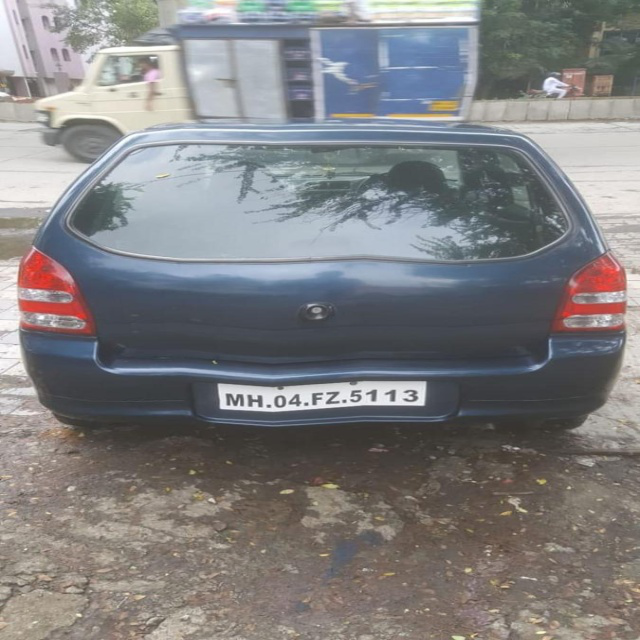

In [10]:
file_path = image_path[2] # path of our image
img = cv2.imread(file_path) # read the image

img = io.imread(file_path) # Read the image
fig = px.imshow(img)
fig.update_layout(width=800, height=640,
                  margin=dict(l=10, r=10, b=10, t=10), 
                  xaxis_title='Verify the data with bounding box')

fig.add_shape(type='rect', x0=218, x1=427, y0=382, y1=412, 
              xref='x', yref='y', 
              line_color='crimson')

---
---